In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns

In [7]:
sys.path.append('/home/zihangw/EvoComm/code')
from model import LanguageModelSoftmax, LanguageModelNorm, LanguageModelNormEPS, LanguageModelStabilized, NormalizeEPS, directional_comm

In [3]:
l_sm_parent = LanguageModelSoftmax(0, 5, 5)

In [4]:
l_sm = LanguageModelSoftmax(0, 5, 5)
l_norm = LanguageModelNorm(1, 5, 5)
l_norm_eps = LanguageModelNormEPS(2, 5, 5)

In [5]:
sample_size = 4
sample_matrix = l_sm_parent.sample_language(sample_size)
l_sm.update_language(sample_matrix)
l_norm.update_language(sample_matrix)
l_norm_eps.update_language(sample_matrix)

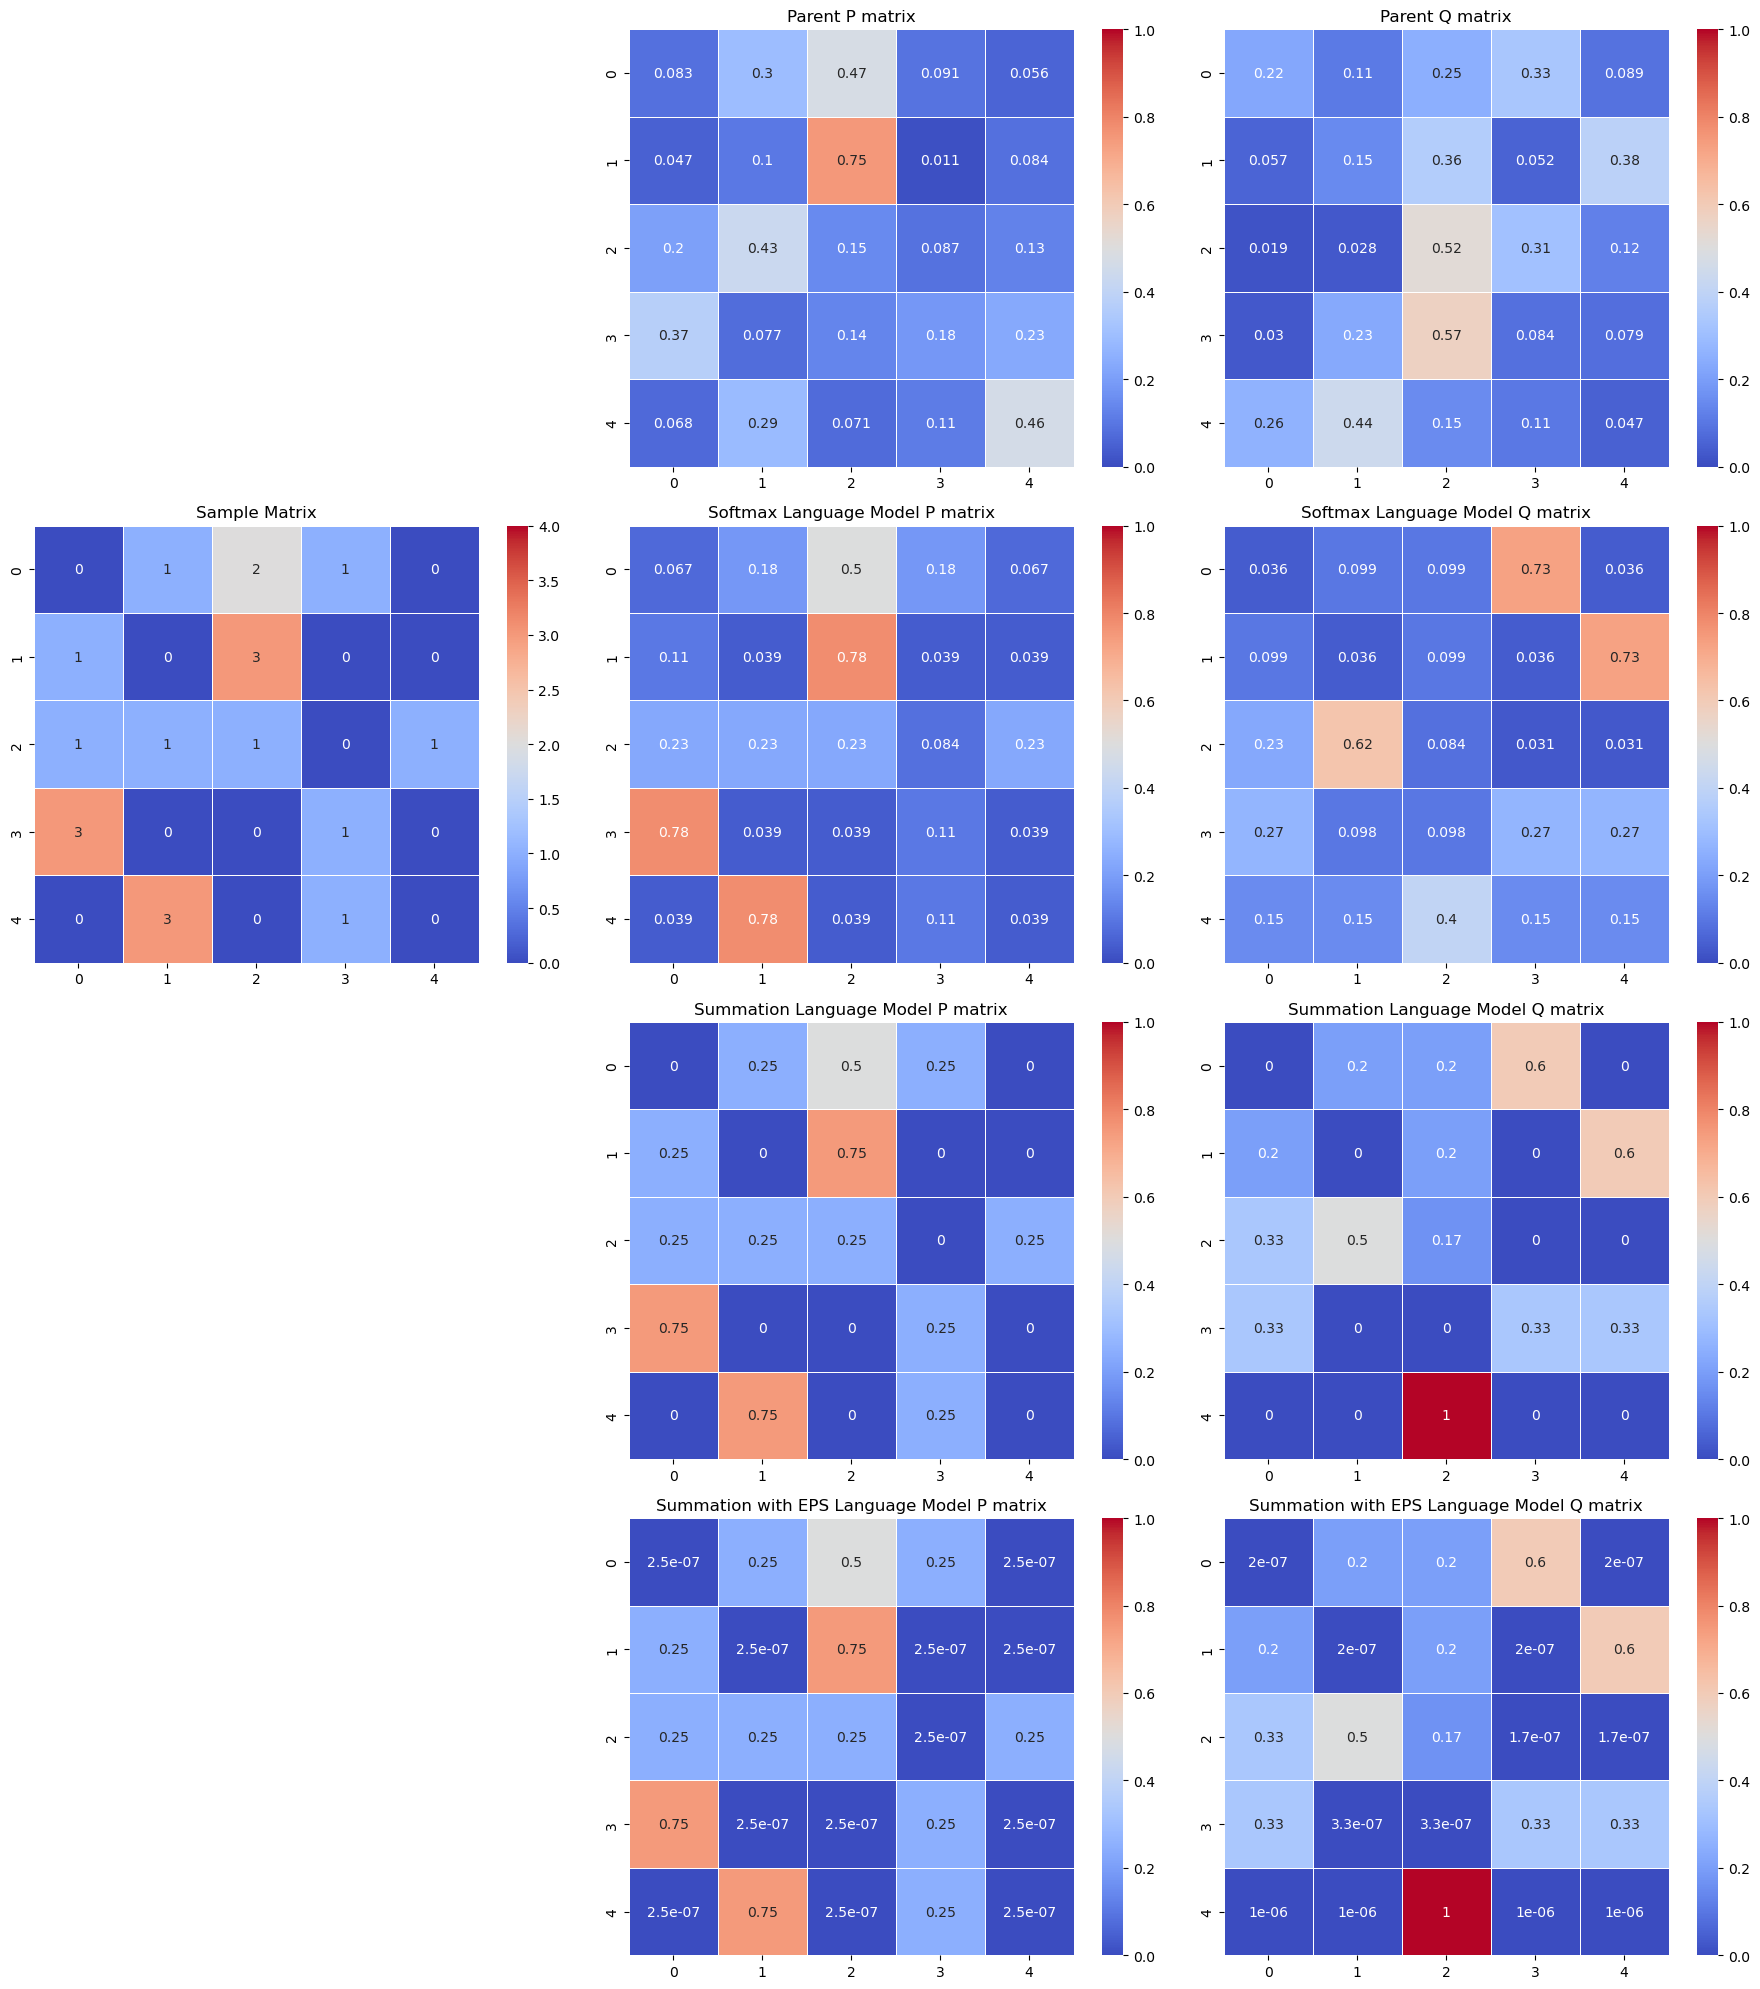

In [6]:
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
# axes = axes.flatten()
axes[0, 0].axis('off')  # Remove the 3rd subplot
sns.heatmap(l_sm_parent.P, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[0, 1], vmin=0, vmax=1)
axes[0, 1].set_title("Parent P matrix")
sns.heatmap(l_sm_parent.Q, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[0, 2], vmin=0, vmax=1)
axes[0, 2].set_title("Parent Q matrix")
sns.heatmap(sample_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[1, 0], vmin=0, vmax=sample_size)
axes[1, 0].set_title("Sample Matrix")
sns.heatmap(l_sm.P, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[1, 1], vmin=0, vmax=1)
axes[1, 1].set_title("Softmax Language Model P matrix")
sns.heatmap(l_sm.Q, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[1, 2], vmin=0, vmax=1)
axes[1, 2].set_title("Softmax Language Model Q matrix")
axes[2, 0].axis('off')  # Remove the 7th subplot
sns.heatmap(l_norm.P, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[2, 1], vmin=0, vmax=1)
axes[2, 1].set_title("Summation Language Model P matrix")
sns.heatmap(l_norm.Q, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[2, 2], vmin=0, vmax=1)
axes[2, 2].set_title("Summation Language Model Q matrix")
axes[3, 0].axis('off')  # Remove the 10th subplot
sns.heatmap(l_norm_eps.P, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[3, 1], vmin=0, vmax=1)
axes[3, 1].set_title("Summation with EPS Language Model P matrix")
sns.heatmap(l_norm_eps.Q, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[3, 2], vmin=0, vmax=1)
axes[3, 2].set_title("Summation with EPS Language Model Q matrix")
fig.tight_layout()
fig.savefig("figures/toy/matrix_values_4eps.jpg", dpi = 600)
# plt.close()

In [7]:
# sample_size = 100
for _ in range(10):
    sample_matrix = l_sm_parent.sample_language(100)
    l_sm_parent.update_language(sample_matrix)

sample_matrix = l_sm_parent.sample_language(sample_size)
l_sm.update_language(sample_matrix)
l_norm.update_language(sample_matrix)
l_norm_eps.update_language(sample_matrix)

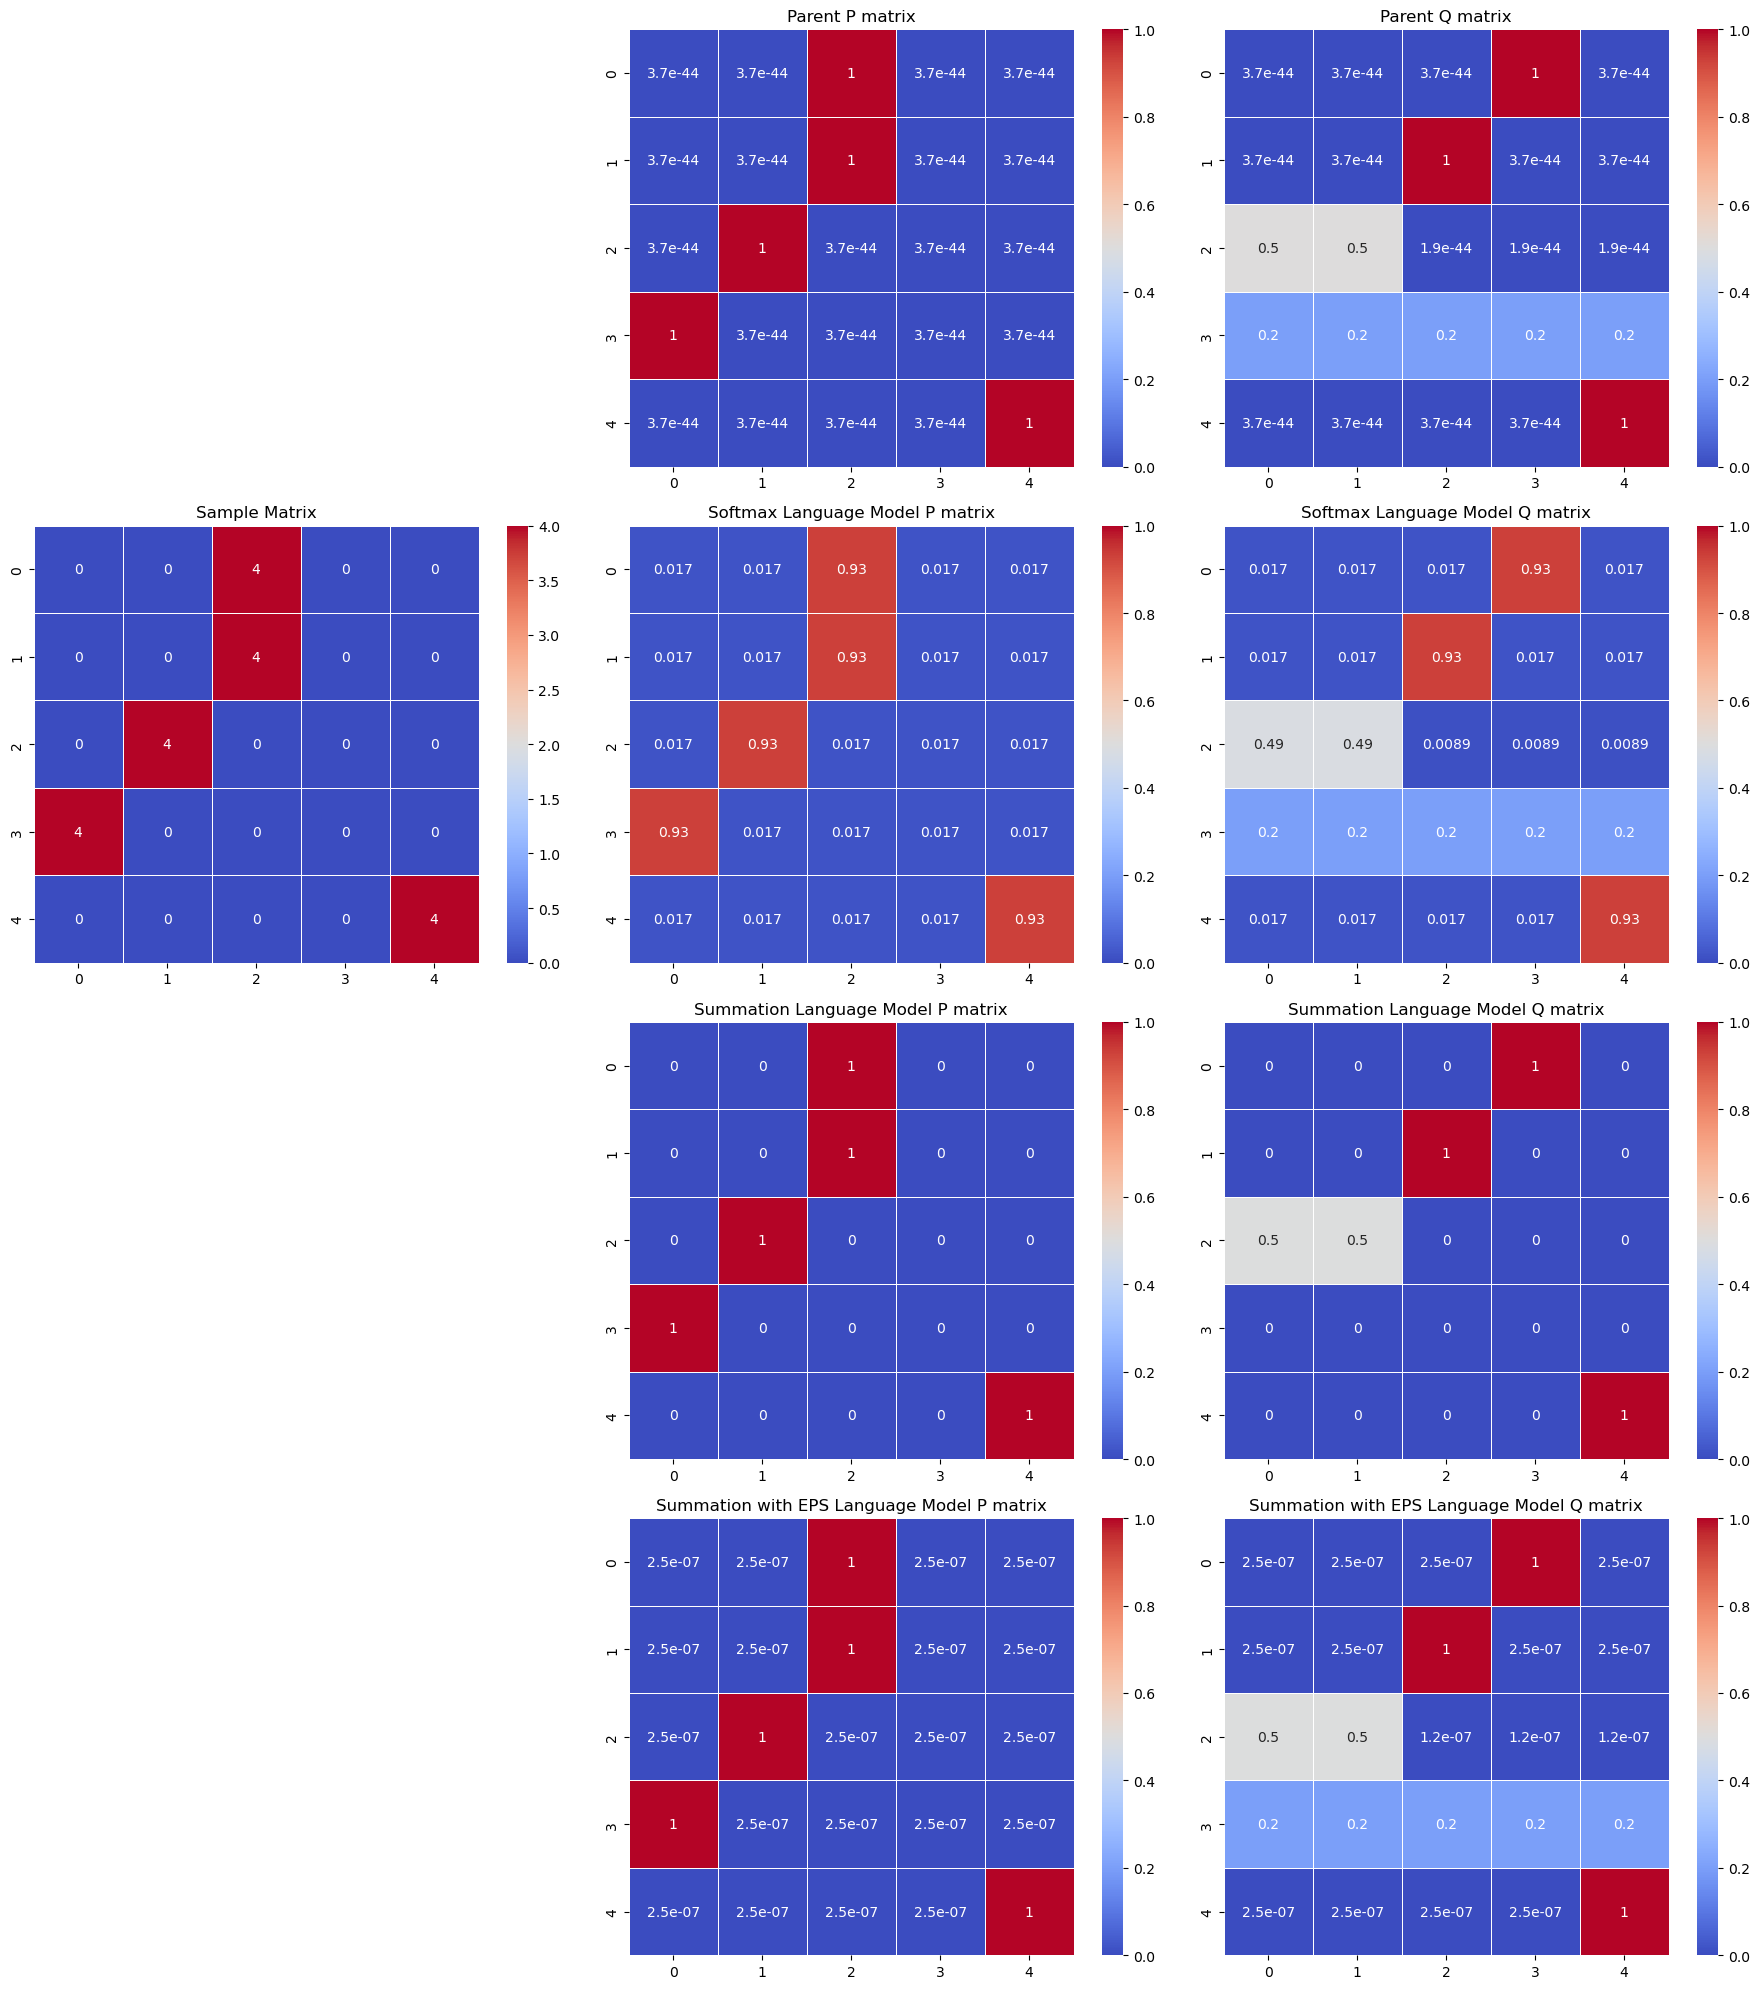

In [8]:
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
# axes = axes.flatten()
axes[0, 0].axis('off')  # Remove the 3rd subplot
sns.heatmap(l_sm_parent.P, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[0, 1], vmin=0, vmax=1)
axes[0, 1].set_title("Parent P matrix")
sns.heatmap(l_sm_parent.Q, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[0, 2], vmin=0, vmax=1)
axes[0, 2].set_title("Parent Q matrix")
sns.heatmap(sample_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[1, 0], vmin=0, vmax=sample_size)
axes[1, 0].set_title("Sample Matrix")
sns.heatmap(l_sm.P, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[1, 1], vmin=0, vmax=1)
axes[1, 1].set_title("Softmax Language Model P matrix")
sns.heatmap(l_sm.Q, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[1, 2], vmin=0, vmax=1)
axes[1, 2].set_title("Softmax Language Model Q matrix")
axes[2, 0].axis('off')  # Remove the 7th subplot
sns.heatmap(l_norm.P, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[2, 1], vmin=0, vmax=1)
axes[2, 1].set_title("Summation Language Model P matrix")
sns.heatmap(l_norm.Q, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[2, 2], vmin=0, vmax=1)
axes[2, 2].set_title("Summation Language Model Q matrix")
axes[3, 0].axis('off')  # Remove the 10th subplot
sns.heatmap(l_norm_eps.P, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[3, 1], vmin=0, vmax=1)
axes[3, 1].set_title("Summation with EPS Language Model P matrix")
sns.heatmap(l_norm_eps.Q, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[3, 2], vmin=0, vmax=1)
axes[3, 2].set_title("Summation with EPS Language Model Q matrix")
fig.tight_layout()
fig.savefig("figures/toy/matrix_values_suboptimal_4eps.jpg", dpi = 600)
# plt.close()

In [4]:
# Invading
num_objects = num_sounds = 5
lang_init = LanguageModelStabilized(0, num_objects, num_sounds)
# lang_init.initialize_language()
lang_init.P = np.array([[1., 0., 0., 0., 0.],
                        [0., 1., 0., 0., 0.],
                        [1., 0., 0., 0., 0.],
                        [0., 1., 0., 0., 0.],
                        [0., 0., 0., 1., 0.]])
lang_init.Q = NormalizeEPS(lang_init.P.T)
# lang_init.Q = np.array([[0.5, 0., 0.5, 0., 0.],
#                         [0., 0.5, 0., 0.5, 0.],
#                         [0.2, 0.2, 0.2, 0.2, 0.2],
#                         [0., 0., 0., 0., 1.],
#                         [0.2, 0.2, 0.2, 0.2, 0.2]])

lang_invade = LanguageModelStabilized(1, num_objects, num_sounds)
# lang_invade.initialize_language()
lang_invade.P = np.array([[0., 0., 1., 0., 0.],
                            [0., 0., 0., 1., 0.],
                            [1., 0., 0., 0., 0.],
                            [0., 1., 0., 0., 0.],
                            [1., 0., 0., 0., 0.]])
lang_invade.Q = NormalizeEPS(lang_invade.P.T)

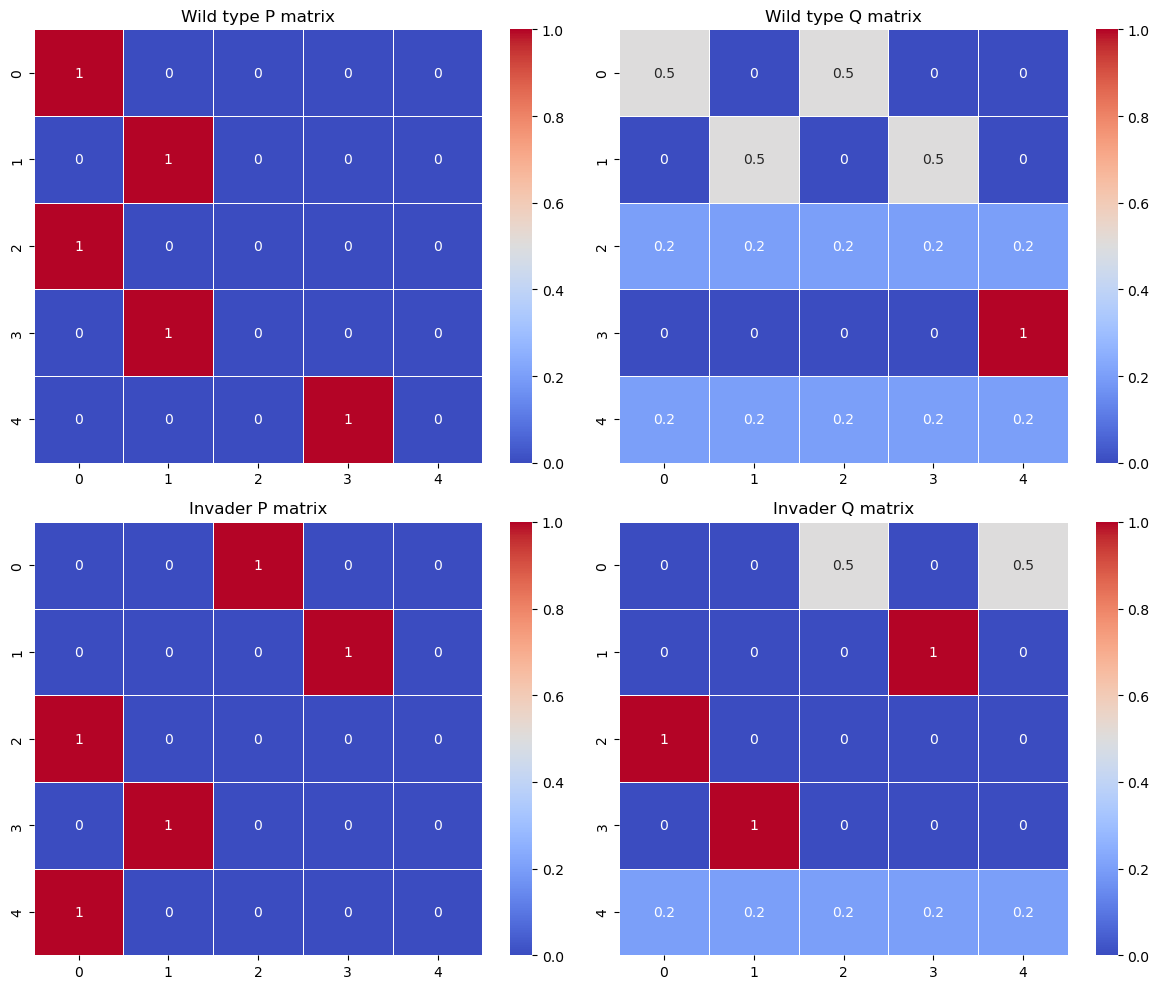

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# axes = axes.flatten()
sns.heatmap(lang_init.P, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[0, 0], vmin=0, vmax=1)
axes[0, 0].set_title("Wild type P matrix")
sns.heatmap(lang_init.Q, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[0, 1], vmin=0, vmax=1)
axes[0, 1].set_title("Wild type Q matrix")
sns.heatmap(lang_invade.P, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[1, 0], vmin=0, vmax=1)
axes[1, 0].set_title("Invader P matrix")
sns.heatmap(lang_invade.Q, annot=True, cmap="coolwarm", linewidths=0.5, ax=axes[1, 1], vmin=0, vmax=1)
axes[1, 1].set_title("Invader Q matrix")
fig.tight_layout()
fig.savefig(os.path.join("/home/zihangw/EvoComm/figures_invading/starter_visual.jpg"), dpi=600)

In [13]:
print(f"wild type to wild type communication payoff: \t {directional_comm(lang_init, lang_init)}")
print(f"wild type to invader communication payoff: \t {directional_comm(lang_init, lang_invade)}")
print(f"invader to wild type communication payoff: \t {directional_comm(lang_invade, lang_init)}")
print(f"invader to invader communication payoff: \t {directional_comm(lang_invade, lang_invade)}")

wild type to wild type communication payoff: 	 3.0
wild type to invader communication payoff: 	 1.5
invader to wild type communication payoff: 	 1.2
invader to invader communication payoff: 	 4.0
